___
# Ciência dos Dados - PROJETO 3 - INSPER

___
## Nome 1

## Nome 2

## Nome 3

___

___

## INTRODUÇÃO

[Detalhe aqui o objetivo deste projeto!!]

___
## MINERANDO DADOS e CARACTERÍSTICAS DO DATASET

[Detalhe aqui as características da base de dados além da análise descritiva.]

In [34]:
import pandas as pd
import os
import matplotlib.pyplot as plt


In [35]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Usuario\Desktop\Insper\2018\DPCD\DPCD\Projeto3


### BASE DE DADOS

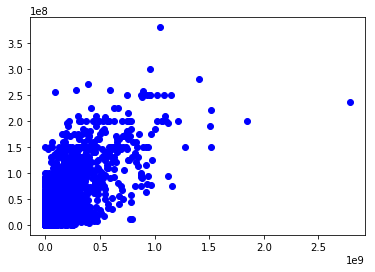

In [36]:
data = pd.read_csv('tmdb_5000_movies.csv', encoding='latin1')
col = data.columns.values #Conteudo de cada coluna
col

nndf = data[pd.notnull(data.revenue)&pd.notnull(data.budget)]#Tira os "NaN" do df

plt.plot(nndf.revenue, nndf.budget, 'bo')


In [39]:
import statsmodels.api as sm

Y = nndf['revenue']
X = nndf[['budget']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     5504.
Date:                Thu, 17 May 2018   Prob (F-statistic):               0.00
Time:                        14:50:40   Log-Likelihood:                -95797.
No. Observations:                4803   AIC:                         1.916e+05
Df Residuals:                    4801   BIC:                         1.916e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -2.63e+06   1.97e+06     -1.335      0.182   -6.49e+06    1.23e+06
budget         2.9227      0.039     74.188      0.000       2.845       3.000
==============================================================================
Omnibus:                     4260.045   Durbin-Watson:                   1.513
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           381126.754
Skew:                           3.828   Prob(JB):                         0.00
Kurtosis:                      45.963   Cond. No.                     6.14e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.14e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### ANÁLISE DESCRITIVA

___
## MODELOS DE PREDIÇÃO

[O tópico C.PROCESSO E ESTATÍSTICAS DE VALIDAÇÃO estará dentro deste tópico. Organize-o aqui de forma clara!]

[ORGANIZE AQUI TODOS OS MODELOS DE PREDIÇÃO NECESSÁRIOS NESTE PROJETO!]

o MODELO DE PREDIÇÃO PELA MÉDIA

o MODELO DOS K VIZINHOS MAIS PRÓXIMOS (K-Nearest Neighbors Regression)

o MODELO DE REGRESSÃO LINEAR (Multiple Linear Regression)

o MODELO DE ÁRVORES DE REGRESSÃO (Decision Tree Regression)

___
## CONCLUSÃO

___
## REFERÊNCIAS BIBLIOGRÁFICAS